# sets up

In [1]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from __future__ import unicode_literals
from gistool import *
from metpy.units import units
import metpy.calc as mpcalc

In [4]:
### matplotlib setups
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5

## data precossing

In [5]:
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
shp2='/portal3/gis/Global_countries/world_map_latest/World_Countries__Generalized_.shp'
shp4='/portal3/gis/Mekong_Delta/mekong_river.shp'
shp3='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'
ds=xr.open_dataset('1959_2021_prec_daily_mm.nc')

In [6]:
ds_remove=ds.sel(time=~((ds.time.dt.month == 2) & (ds.time.dt.day == 29)))
ds_r=ds_remove.sel(time=((ds_remove.time.dt.month==5)|(ds_remove.time.dt.month==6)|
                      (ds_remove.time.dt.month==7)|(ds_remove.time.dt.month==8)|
                      (ds_remove.time.dt.month==9)|(ds_remove.time.dt.month==10)))
ds_mr = ds_r.sel(time=ds_r.time)




In [8]:
ds_meanr = xr.Dataset({'tp': (['lat', 'lon'], arr_meanr)},
                    coords={'lon': (['lon'], ds_mr.lon),
                            'lat': (['lat'], ds_mr.lat)})

ds_19r = xr.Dataset({'tp': (['lat', 'lon'], arr_19r)},
                    coords={'lon': (['lon'], ds_mr.lon),
                            'lat': (['lat'], ds_mr.lat)})


In [9]:
ds_19r_ano = (ds_19r-ds_meanr)*184

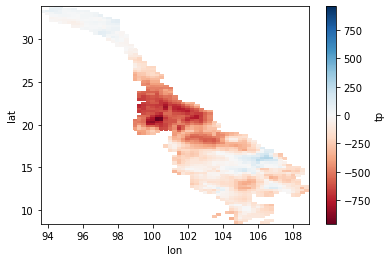

In [10]:
#slice shpfile and save as ds_bw_mk

ds_bw_mk,_ = ncslice(ds_19r_ano,shp3,18,index='LEGEND')
ds_bw_mk.tp.plot(cmap='RdBu')
plt.rcParams["figure.figsize"] = (5,6)

## plot seasonal precipitation ano

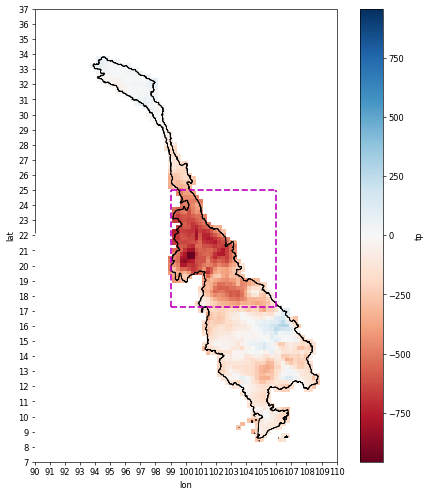

In [11]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=60)
shenzhen_lon, shenzhen_lat = 90, 7 # Shenzhen

# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(17,25,9)),ylocs=list(np.linspace(90,110,20)),
                  linewidth=5, color='black', alpha=1,zorder=8)

# x label and tick
ax.set_xticks(np.linspace(-180, 180, 361))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 181))
ax.set_xlabel('Longitude',fontsize=10)


# set extent area
extent = [shenzhen_lon, shenzhen_lon+20, shenzhen_lat, shenzhen_lat+30]
ax.set_extent(extent)




# feature and mask
ax.add_feature(cfeature.OCEAN, facecolor='w',alpha=1,zorder=3)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='none', linewidth=0.4,alpha=1,zorder=4)

ds_bw_mk.tp.plot(transform=ccrs.PlateCarree(),zorder=5,cmap='RdBu')

ax = stack_shp(ax,  shp3, facecolor='none', edgecolor='k', linewidth=1, alpha=1, zorder=5)
ax.plot([99,99], [17.25,25], '--',color='m',lw=2, transform=ccrs.PlateCarree(),zorder=7)
ax.plot([106,106], [17.25,25], '--',color='m',lw=2, transform=ccrs.PlateCarree(),zorder=6)
ax.plot([99,106], [17.25,17.25], '--', color='m',lw=2, transform=ccrs.PlateCarree(),zorder=8)
ax.plot([99,106], [25,25], '--',color='m',lw=2, transform=ccrs.PlateCarree(),zorder=9)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(17,25,9)),ylocs=list(np.linspace(90,110,20)),linewidth=5, color='black', alpha=1,zorder=8)
#ax = stack_shp(ax,  shp2, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=1)
#ax = stack_shp(ax,  shp4, facecolor='none', edgecolor='dodgerblue', linewidth=0.5, alpha=0.8, zorder=2)
#plt.savefig('pre.pdf')
plt.show() 



## calculate precipitaiton each year in M-LMRB

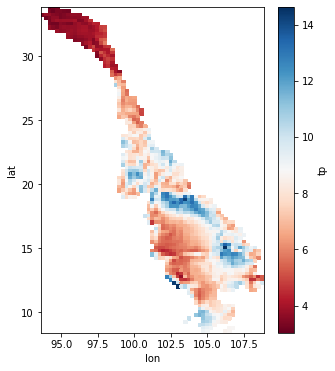

In [12]:
#slice shpfile and save as ds_bw_mk

prec,_ = ncslice(ds_r,shp3,18,index='LEGEND')
prec.tp.mean('time').plot(cmap='RdBu')
plt.rcParams["figure.figsize"] = (5,6)

In [13]:
time = 0
y = 1959
i = 0
j = 184
while y <2022:
    prect = prec.resample(time='Y').sum(skipna=False)

    ds_1 = prect.sel(lat=prect.lat[35:68],lon=prect.lon[:],
                    time=prect.time[time])
    precsum = np.nansum((ds_1.tp.values)/(184*24*60*60)*28000*28000/10**6)
    i+=184
    j+=184
    time+=1

    
    print(precsum)
    y+=1
    
    

37.453419714542214
41.26582294064828
43.2578118046931
35.5036593908657
41.55591695512167
40.67115646995016
40.10577556124824
38.10416880885568
33.59354952998015
36.771400109043825
37.6700524813887
40.037234678468074
43.19094374301929
41.4395054596365
44.393554418444054
40.361682280695575
43.079019228494495
41.59824226053824
39.45682024435145
47.1204816891337
37.74199663859443
41.576593130790485
46.57610954155669
41.84196554764458
39.03442790186539
41.021651355172125
38.797969563494945
40.96780722244926
37.555837117255024
36.71259819282618
40.58978814412238
41.230952276331216
39.09807573241696
37.12594524272974
36.990594255567174
45.96596722791736
43.07995714331979
37.88609932123943
37.8174196931283
32.01490894391341
37.62052925662718
40.655721183568
41.94212638449554
43.922132940492
32.559932022156154
36.65915212781725
38.420373261861755
37.05621970749516
37.34858381170005
41.319103901873845
35.661818713803996
37.94844722889088
40.187378416199614
36.17855011256612
38.34169790780871
35.

## research region plot

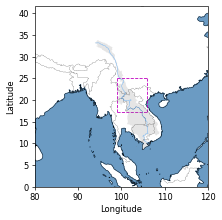

In [14]:



# Create and define the size of a figure object 
plt.figure(figsize=(6,4), dpi=60)
shenzhen_lon, shenzhen_lat = 80, 0 # Shenzhen

# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
#                  linewidth=0.1, color='black', alpha=0.3,zorder=3)

# x label and tick
ax.set_xticks(np.linspace(-180, 180, 37))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(-90,90, 37))
ax.set_xlabel('Longitude',fontsize=10)


# set extent area
extent = [shenzhen_lon, shenzhen_lon+40, shenzhen_lat, shenzhen_lat+40]
ax.set_extent(extent)

ax.plot([99,99], [17.25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([106,106], [17.25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([99,106], [17.25,17.25], '--', color='m',lw=1, transform=ccrs.PlateCarree())
ax.plot([99,106], [25,25], '--',color='m',lw=1, transform=ccrs.PlateCarree())


# feature and mask
ax.add_feature(cfeature.OCEAN, facecolor='steelblue', zorder=0,alpha=0.8)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=0.4,alpha=1)
ax = stack_shp(ax,  shp, facecolor='gray', edgecolor='none', linewidth=1, alpha=0.2, zorder=2)
ax = stack_shp(ax,  shp2, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=4)
ax = stack_shp(ax,  shp4, facecolor='none', edgecolor='dodgerblue', linewidth=0.5, alpha=0.6, zorder=6)
plt.show() 

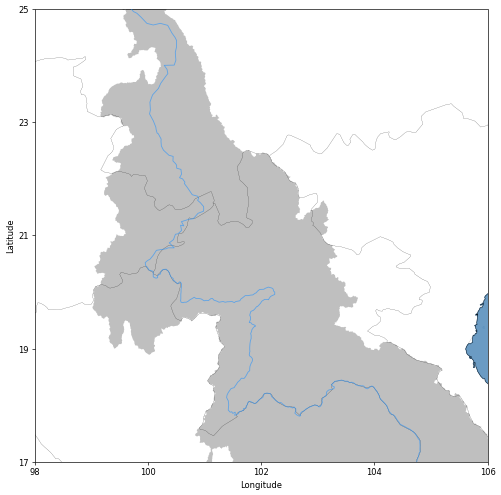

In [15]:



# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=60)
shenzhen_lon, shenzhen_lat = 98, 17 # Shenzhen

# project
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
#ax.gridlines(crs=ccrs.PlateCarree(),xlocs=list(np.linspace(-180,180,37)),ylocs=list(np.linspace(-90,90,37)),
#                  linewidth=0.1, color='black', alpha=0.3,zorder=3)

# x label and tick
ax.set_xticks(np.linspace(90, 110, 11))
ax.set_ylabel('Latitude',fontsize=10)
# y label and tick
ax.set_yticks(np.linspace(17,25, 5))
ax.set_xlabel('Longitude',fontsize=10)


# set extent area
extent = [shenzhen_lon, shenzhen_lon+8, shenzhen_lat, shenzhen_lat+8]
ax.set_extent(extent)


# feature and mask
ax.add_feature(cfeature.OCEAN, facecolor='steelblue', zorder=0,alpha=0.8)
ax.add_feature(cfeature.COASTLINE,facecolor='none', edgecolor='k', linewidth=0.4,alpha=1)
ax = stack_shp(ax,  shp, facecolor='gray', edgecolor='none', linewidth=1, alpha=0.5, zorder=2)
ax = stack_shp(ax,  shp2, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1, zorder=4)
ax = stack_shp(ax,  shp4, facecolor='none', edgecolor='dodgerblue', linewidth=1, alpha=0.6, zorder=6)

plt.show() 

## calculate precipitaiton each year in whole basin

In [16]:
time = 0
y = 1959
i = 0
j = 184
while y <2022:
    prect = prec.resample(time='Y').sum(skipna=False)

    ds_1 = prect.sel(time=prect.time[time])
    precsum = np.nansum((ds_1.tp.values)/(184*24*60*60)*28000*28000/10**6)
    time+=1

    print(precsum)
    y+=1
    

84.46842256017736
95.28944823014754
96.52427515303262
91.27811523240929
96.5390663113187
95.74581671710176
95.12048651088647
95.25333506745417
78.08644612611779
84.29280989031093
88.03745256212022
88.11574972942063
97.58815763786794
100.1969489044767
98.86232004650932
94.09969994973446
103.26342926255747
98.2380088998423
90.37831554498842
105.48976007719547
94.34176211555223
104.90274059627367
101.52815770282838
93.0444834239241
95.80559801823468
96.05717816793593
93.0248602484121
99.32545114855067
92.43624243301663
92.9820178182728
96.01361687474397
97.84565655743634
96.8584644232856
90.04044356369165
89.53636126777783
96.07426623192387
97.04798415517268
92.8784332360776
89.34787170379441
83.59105538311404
92.70729660286035
99.65837769783253
94.43868316840818
98.1629407753998
86.88526589207795
85.39105063740949
88.00782342069198
92.64122560068029
97.28630867317679
96.27515770210353
92.75541063919925
92.856177127488
97.17842677529501
87.47988895575973
96.51852552183584
86.6191606518535